In [1]:
import cv2 

In [2]:
import matplotlib.pyplot as plt 

In [3]:
frozen_model = 'frozen_inference_graph.pb'
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classlabels = []
f = open('labels.txt','r')
for line in f:
    classlabels.append(line.strip())

In [6]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classlabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001D60868D9B0>

# Object detection on an Image


In [9]:
 img = cv2.imread('img6.jfif')

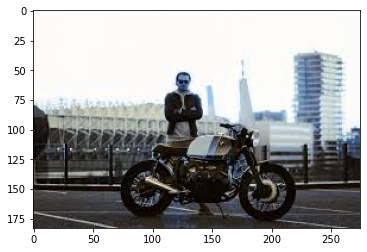

In [10]:
plt.imshow(img)

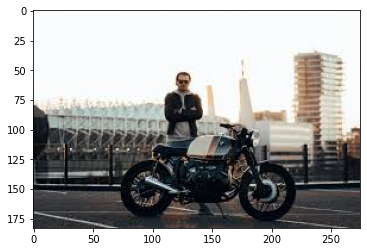

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex,confidence,bbox = model.detect(img,confThreshold = 0.7)


In [13]:
print(ClassIndex)

[[4]
 [1]]


In [14]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf , boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    if(ClassInd <= 81):
        cv2.rectangle(img,boxes,(255,0,0),1)
        cv2.putText(img,classlabels[ClassInd-1],(boxes[0],boxes[1]),font,fontScale = font_scale,color = (0,0,255),thickness=1)

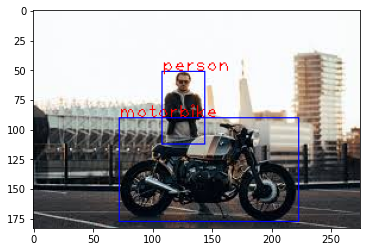

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Object detection in a video

In [16]:
cap = cv2.VideoCapture("London1.mp4")

#check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Video")
    
font_scale = 2
font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    ret,frame = cap.read()
    
    ClassIndex,confidence,bbox = model.detect(frame,confThreshold = 0.5)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf , boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd <= 81):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color = (0,0,255),thickness=2)
     
    cv2.imshow('Object Detection in a Video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()
    


[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [10]]
[[ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [10]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [10]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [10]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [33]
 [ 1]
 [31]
 [ 7]
 [ 6]
 [ 1]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [31]
 [ 1]
 [10]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 3]
 [31]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [31]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [27]
 [ 1]
 [31]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [10]
 [ 3]
 [ 3]
 

 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 8]
 [10]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 8]
 [10]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 8]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [ 8]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]]
[[ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 8]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 3]
 [10]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 8]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 8]
 [ 1]
 [ 3]
 [31]]
[[ 1]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 8]
 [ 1]
 [ 3]
 [31]]
[[ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 3]
 [10]
 [ 3]
 [ 8]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [ 8]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 6]
 [ 1]
 [ 1]]
[[ 3]
 [ 1]
 [ 3

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 1]]
[[ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 8]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [10]
 [ 3]
 [ 1]
 [ 8]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [ 1]
 [ 3]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 8]
 [ 1]
 [ 1]]
[[ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 8]
 [ 1]
 [ 1]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [10]
 [ 3]
 [ 3]
 [ 8]
 [ 1]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 3]
 [ 3]
 [ 3]
 [ 8]
 [ 1]]
[[ 3]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [10]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [10]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [32]
 [ 1]
 [ 1]
 [10]]
[[ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 1]]
[[ 

[[ 3]
 [ 1]
 [ 3]
 [31]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [ 2]
 [27]
 [ 1]]
[[ 3]
 [ 1]
 [ 3]
 [31]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [ 2]
 [27]
 [ 1]]
[[ 1]
 [ 3]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 2]
 [ 1]
 [ 3]
 [27]
 [ 1]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [31]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]]
[[3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]]
[[3]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [3]
 [8]
 [1]
 [3]
 [3]
 [2]]
[[ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 8]
 [10]
 [ 1]]
[[ 3]
 [ 1]
 [

 [ 1]]
[[1]
 [1]
 [6]
 [1]
 [1]
 [1]
 [7]
 [1]
 [1]
 [1]
 [1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 7]]
[[ 1]
 [ 1]
 [ 7]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 7]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 7]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 7]
 [ 6]
 [ 1]
 [31]
 [ 1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [7]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 7]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 7]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [28]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 6]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 6]

[[ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 1]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 1]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 3]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 3]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [3

[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]

 [1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
